In [1]:
import numpy as np
import matplotlib.pyplot as pyplot

A = np.loadtxt("band.txt")

In [2]:
import math

def dist(i,j):
    return math.sqrt((x[i]-x[j])**2 + (y[i]-y[j])**2)

def tourDist(alist):
    d = dist(alist[0],alist[-1])
    for i in range(1,len(alist)):
        d = d+dist(alist[i-1], alist[i])
    return d

def lengthTour(cityCount):
    total = math.sqrt((A[cityCount-1][0]-A[0][0])**2+(A[cityCount-1][1]-A[0][1])**2)
    for i in range(cityCount-1):
        x1 = A[i][0]
        y1 = A[i][1]
        x2 = A[i+1][0]
        y2 = A[i+1][1]
        l = math.sqrt((x2-x1)**2+(y2-y1)**2)
        total += l
    return total

def tour(list):
    x2=[x[i] for i in list]
    y2=[y[i] for i in list]
    pyplot.plot(x2,y2,c='green')
    for i in list:
        pyplot.annotate(xy=[x[i],y[i]],s=i)

x = [float(A[i][0]) for i in range(len(A))] 
y = [float(A[i][1]) for i in range(len(A))] 

print("length of tour of first 5 cities: ",lengthTour(5))
print("length of tour of all cities: ",lengthTour(len(A)))


length of tour of first 5 cities:  7201.131775150942
length of tour of all cities:  173679.47923556465


<IPython.core.display.Javascript object>


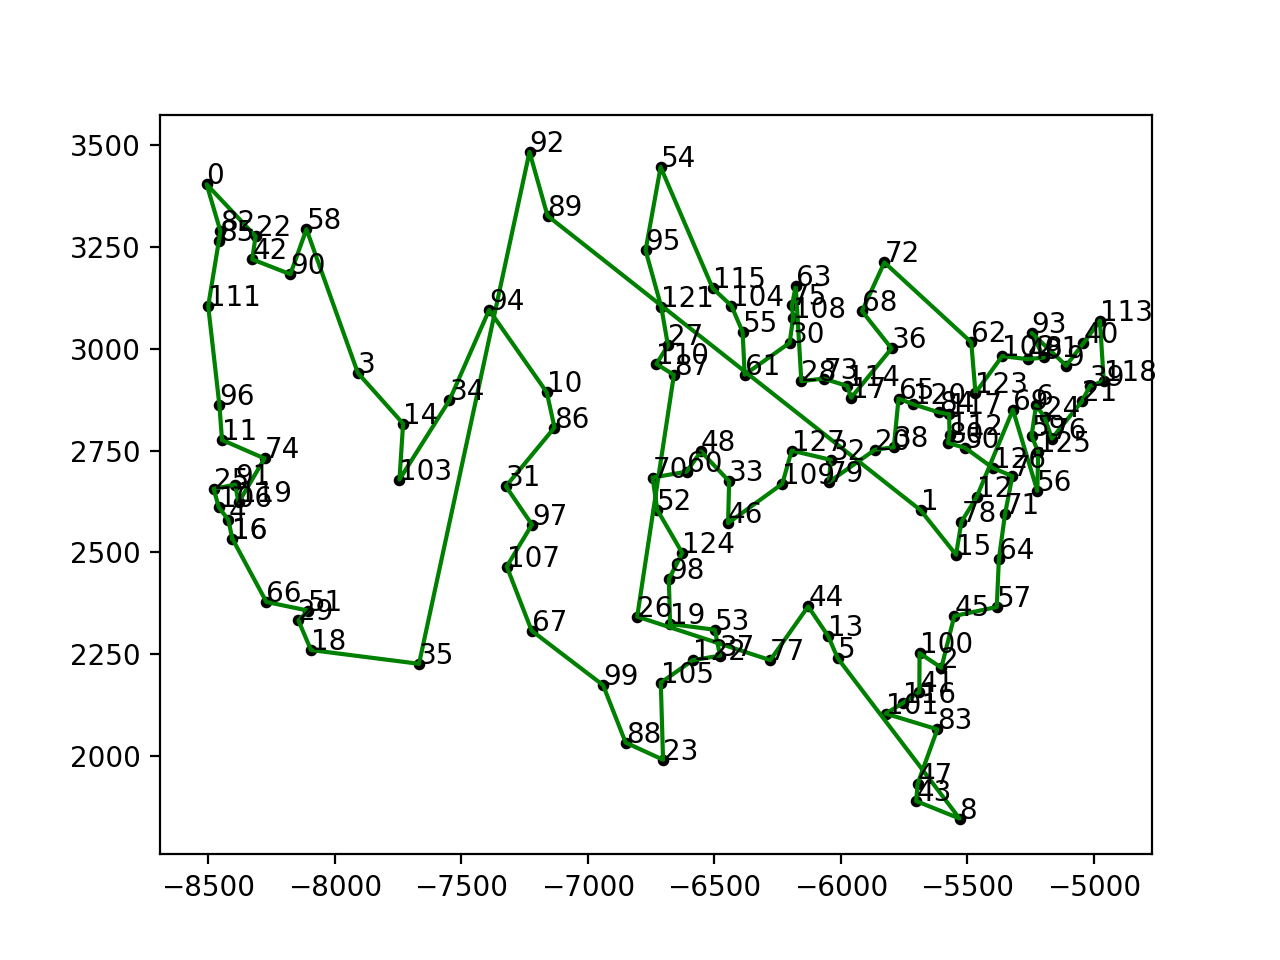

path:  [16, 4, 106, 25, 91, 119, 74, 11, 96, 111, 85, 82, 0, 22, 42, 90, 58, 3, 14, 103, 34, 94, 10, 86, 31, 97, 107, 67, 99, 88, 23, 105, 122, 37, 53, 19, 98, 124, 52, 70, 60, 48, 33, 46, 109, 127, 32, 79, 20, 38, 65, 120, 84, 117, 112, 80, 50, 126, 7, 71, 64, 57, 45, 2, 100, 41, 116, 101, 83, 47, 43, 8, 5, 13, 44, 77, 26, 87, 110, 27, 121, 95, 54, 115, 104, 55, 61, 30, 108, 75, 63, 28, 73, 114, 17, 36, 68, 72, 62, 123, 102, 49, 81, 93, 9, 40, 113, 118, 39, 21, 76, 24, 6, 59, 125, 56, 69, 12, 78, 15, 1, 89, 92, 35, 18, 29, 51, 66, 16]
distance:  20976.707536651193


In [3]:
x = [float(A[i][0]) for i in range(len(A))] 
y = [float(A[i][1]) for i in range(len(A))]  

##dijkstra 20976.707536651193
%matplotlib notebook
def tsp4(num,n):
    old = list(range(0,num))
    old.remove(n)
    pre = n
    bestp = [pre]
    best = 0   
    pyplot.scatter(x[pre], y[pre], c='black', s=10)

    while len(old) > 1 :
        d_min = 10000
        d_min_idx = 10000
        
  
        for i in old:
            now = dist(pre, i)                
            if now < d_min:
                d_min_idx = i
                d_min = now    
        
        old.remove(d_min_idx)
        bestp.append(d_min_idx)
        best += d_min
        pre = d_min_idx
    
    last = old.pop()
    bestp.append(last)
    best += dist(pre, last)
    bestp.append(n)
    best += dist(last, n)
    return [best,bestp]


min_d = tsp4(128,0)[0]
min_p = []
for i in range(1,128):
    [d,p]=tsp4(128,i)
    if (d < min_d):
        min_d = d
        min_p = p

tour(min_p)
print("path: ", min_p)
print("distance: ", min_d)
pyplot.show()